In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = [
"india bombed terrorist hideout in pakistan",
"rcb won the ipl",
"prime minister inaugurated a new bridge",
"sensex hits a high after many days",
"heavy rains flood mimbai streets",
"india surpasses japan to become fourth largest economy",
"kashmir witnessed fresh snowfall",
"ipl stempede killed eleven and left fourty seven injured"
]

In [10]:
# Tokenize the sentence - turn words into numbers
"""
rcb won the ipl! => ['rcb', 'won', 'the', 'ipl', '!'] => [1,2,3,4,5]

"""

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index) + 1

print(total_words)


47


In [12]:
# Create sequence for each line

"""
"kashmir witnessed fresh snowfall"

[1,2]
[1,2,3]
[1,2,3,4]

it helps the model learn how sentences grow.

# Creating progressive n grams.

"""

input_sequence = []

for line in data:

  token_list = tokenizer.texts_to_sequences([line])[0]

  for i in range(1, len(token_list)):

    n_gram_sequence = token_list[:i+1]
    input_sequence.append(n_gram_sequence)

In [13]:
# Padding => Making all sequences of equal lengths.
"""
Since, NN require inputs to be the same length
and hence, we pad shorter sequences with 0s in the beginning to make the length same. (pre-padding)
"""

max_sequence_len = max([len(seq) for seq in input_sequence])
input_sequences = pad_sequences(input_sequence, maxlen = max_sequence_len, padding = 'pre')

In [14]:
# SPlit input and O/P

X = input_sequences[:,:-1] # taking all words except the last.
y = input_sequences[:,-1] # taking alast words as label

In [16]:
# One hot encode the target variable
"""
index 5 => [0,0,0,0,1,0,0,0,0]

required for multi class classification

"""

y = tf.keras.utils.to_categorical(y, num_classes=total_words)



In [17]:
# Building RNN model

model = Sequential([
    Embedding(input_dim=total_words, output_dim=10,input_length = max_sequence_len - 1),
    SimpleRNN(100),
    Dense(total_words, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
# Compile the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Training the model
history = model.fit(X, y, epochs=500, verbose = 0)

In [26]:
seed_text = "rcb won the"
token_list = tokenizer.texts_to_sequences([seed_text])[0]
padded = pad_sequences([token_list])

pred = model.predict(padded)
predicted_index = np.argmax(pred)

predicted_word = ""

for word, index in tokenizer.word_index.items():

  if index == predicted_index:
    predicted_word = word

    break


print(f"Input: '{seed_text}'. Predicted next word: '{predicted_word}'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Input: 'rcb won the'. Predicted next word: 'ipl'


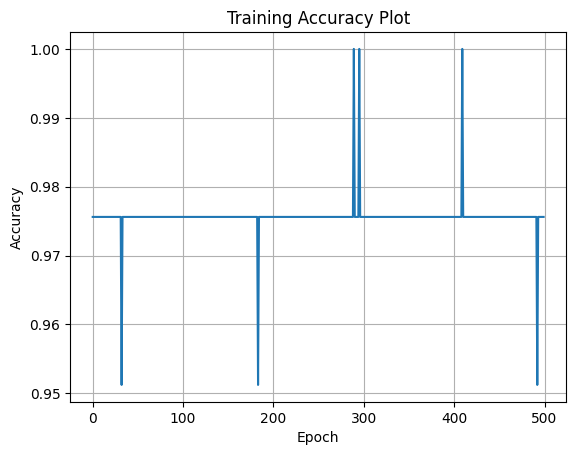

In [28]:
# Plot training accuracy

plt.plot(history.history['accuracy'])
plt.title("Training Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

**Prerequisites for NLP:**

Python Fundamentals:

- Basic Syntax:

Understanding variables, data types, control flow (if/else, loops), and functions is crucial for writing any Python code, including NLP programs.

- Data Structures:

Familiarity with lists, dictionaries, and sets is essential for working with text data and manipulating text features.

- Object-Oriented Programming (OOP):

While not strictly necessary for all NLP tasks, OOP concepts can make your code more organized and maintainable.


Maths:

Linear Algebra:
- Understanding vectors, matrices, and operations such as addition, multiplication, and transformations is crucial, especially for working with word embeddings and neural networks.
Calculus:
- Knowledge of derivatives and gradients is important for optimization techniques used in training machine learning models, particularly in gradient descent algorithms.
Probability and Statistics:
- A strong grasp of probability theory, including concepts like distributions, Bayes' theorem, and conditional probability, is essential for understanding language models and making predictions.
- Statistical methods are also important for evaluating model performance (e.g., precision, recall, F1 score).
Discrete Mathematics:
- Familiarity with concepts from discrete math, such as graphs and combinatorics, can be useful for understanding language structures and algorithms, particularly in parsing and search algorithms.
Information Theory:
- Concepts like entropy and mutual information help in understanding the efficiency of language models and the information content of text.

Deep Learning:

Whole class notes + hands on